<a href="https://colab.research.google.com/github/ahmed-5036/Reinforcement-Learning-Agent-for-Taxi-Navigation/blob/master/taxi_navigation_rl_q_agent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Crowded city](city-1265055_1280.jpg)

In the quest for efficiency and effectiveness in urban transportation, finding the optimal routes to take passengers from their initial locations to their desired destinations is paramount. This challenge is not just about reducing travel time; it's about enhancing the overall experience for both drivers and passengers, ensuring safety, and minimizing environmental impact.

You have been asked to revolutionize the way taxis navigate the urban landscape, ensuring passengers reach their destinations swiftly, safely, and satisfactorily. As an initial step, your goal is to build a reinforcement learning agent that solves this problem within a simulated environment.

## The Taxi-v3 environment
The Taxi-v3 environment is a strategic simulation, offering a grid-based arena where a taxi navigates to address daily challenges akin to those faced by a taxi driver. This environment is defined by a 5x5 grid where the taxi's mission involves picking up a passenger from one of four specific locations (marked as Red, Green, Yellow, and Blue) and dropping them off at another designated spot. The goal is to accomplish this with minimal time on the road to maximize rewards, emphasizing the need for route optimization and efficient decision-making for passenger pickup and dropoff.

### Key Components:
- **Action Space:** Comprises six actions where 0 moves the taxi south, 1 north, 2 east, 3 west, 4 picks up a passenger, and 5 drops off a passenger.
- **Observation Space:** Comprises 500 discrete states, accounting for 25 taxi positions, 5 potential passenger locations, and 4 destinations.
- **Rewards System:** Includes a penalty of -1 for each step taken without other rewards, +20 for successful passenger delivery, and -10 for illegal pickup or dropoff actions. Actions resulting in no operation, like hitting a wall, also incur a time step penalty.

![Taxi-v3 environment snapshot](Taxi_snap.png)


In [ ]:
# Re-run this cell to install and import the necessary libraries and load the required variables
!pip install gymnasium[toy_text] imageio
import numpy as np
import gymnasium as gym
import imageio
from IPython.display import Image
from gymnasium.utils import seeding
import matplotlib.pyplot as plt

# Initialize the Taxi-v3 environment
env = gym.make("Taxi-v3", render_mode='rgb_array')

# Seed the environment for reproducibility
env.np_random, _ = seeding.np_random(42)
env.action_space.seed(42)
np.random.seed(42)

# Maximum number of actions per training episode
max_actions = 100

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 3.6 MB/s eta 0:00:00


**Q-learning parameters**

In [ ]:
num_episodes=2000
alpha= 0.1  # Learning rate
gamma= 0.95 # Discount factor
epsilon= 0.9# Exploration rate
num_states, num_actions= env.observation_space.n, env.action_space.n
Q=np.zeros((num_states,num_actions))
episode_returns=[]


**Define the epsilon-greedy policy**

In [ ]:
def epsilon_greedy(state):
  # With probability epsilon, choose a random action (exploration)
  if np.random.rand() < epsilon:
    action = env.action_space.sample()
  else:
     # Otherwise, choose the action with the highest Q-value (exploitation)
    action = np.argmax(Q[state, :])
  return action

**function to update the Q-table**

In [ ]:
def update_q_table(state, action, reward, next_state):
    old_value=Q[state, action]
    next_max=np.max(Q[next_state])
    Q[state, action]=(1-alpha)*old_value+alpha*(reward+gamma*next_max)

**Train the agent**

In [ ]:
 for episode in range(num_episodes):
        state, info=env.reset()
        terminated= False
        episode_total_reward=0
        if episode % 200 == 0: print(f"Episode {episode}/{num_episodes}\n")
        for i in range(max_actions):
            if terminated : break
            action=epsilon_greedy(state)
            new_state, reward, terminated, truncated, info = env.step(action) # take the action
            update_q_table(state, action, reward, new_state)
            episode_total_reward += reward
            state=new_state
        episode_returns.append(episode_total_reward)
print(f"Episode {num_episodes}/{num_episodes}\n")

Episode 0/2000

Episode 200/2000

Episode 400/2000

Episode 600/2000

Episode 800/2000

Episode 1000/2000

Episode 1200/2000

Episode 1400/2000

Episode 1600/2000

Episode 1800/2000

Episode 2000/2000



**Save the learned Q-values and Extract the learned policy**

In [ ]:
q_table = Q
def get_policy():
    policy={state:np.argmax(Q[state]) for state in range (num_states)}
    return policy


In [ ]:
policy=get_policy()
print(policy)

{0: 0, 1: 4, 2: 4, 3: 4, 4: 2, 5: 0, 6: 3, 7: 3, 8: 0, 9: 3, 10: 0, 11: 0, 12: 0, 13: 3, 14: 2, 15: 0, 16: 5, 17: 2, 18: 0, 19: 0, 20: 0, 21: 3, 22: 3, 23: 3, 24: 2, 25: 0, 26: 3, 27: 0, 28: 0, 29: 3, 30: 0, 31: 2, 32: 3, 33: 0, 34: 2, 35: 0, 36: 3, 37: 0, 38: 3, 39: 0, 40: 0, 41: 3, 42: 0, 43: 0, 44: 2, 45: 0, 46: 2, 47: 2, 48: 0, 49: 0, 50: 0, 51: 0, 52: 1, 53: 2, 54: 3, 55: 0, 56: 0, 57: 2, 58: 0, 59: 0, 60: 0, 61: 2, 62: 2, 63: 2, 64: 2, 65: 0, 66: 2, 67: 2, 68: 1, 69: 1, 70: 0, 71: 0, 72: 0, 73: 0, 74: 3, 75: 0, 76: 0, 77: 2, 78: 0, 79: 0, 80: 0, 81: 2, 82: 1, 83: 1, 84: 4, 85: 0, 86: 4, 87: 4, 88: 2, 89: 3, 90: 0, 91: 0, 92: 0, 93: 0, 94: 3, 95: 0, 96: 3, 97: 5, 98: 3, 99: 0, 100: 0, 101: 1, 102: 1, 103: 1, 104: 0, 105: 0, 106: 0, 107: 0, 108: 0, 109: 0, 110: 0, 111: 0, 112: 2, 113: 0, 114: 1, 115: 0, 116: 1, 117: 0, 118: 0, 119: 2, 120: 0, 121: 3, 122: 1, 123: 1, 124: 0, 125: 0, 126: 0, 127: 0, 128: 3, 129: 1, 130: 0, 131: 1, 132: 0, 133: 0, 134: 1, 135: 0, 136: 3, 137: 0, 138: 

**Test the agent's learned policy for one episode**

In [ ]:
state, info =env.reset(seed=42)
terminated = False
episode_total_reward = 0
frames=[]

for i in range(16):
        if terminated : break
        frames.append(env.render())
        action = policy[state] # Choose the action according to the learned policy
        new_state, reward, terminated, truncated, info = env.step(action)
        state = new_state
        episode_total_reward += reward


print(f"Episode {num_episodes}/{num_episodes}\n")
print(f"Episode {episode_total_reward}\n")

Episode 2000/2000

Episode 8



**visualize agent's performance in navigating the environment**

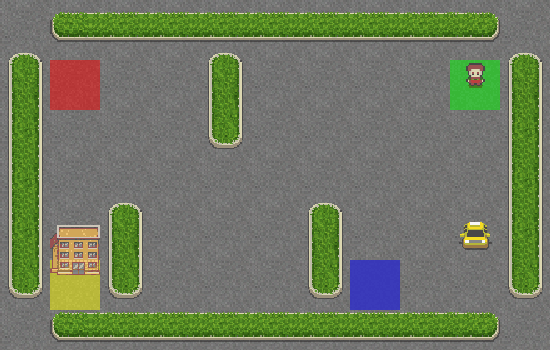

In [ ]:
# Once you are done, run this cell to visualize the agent's behavior through the episode
# Save frames as a GIF
imageio.mimsave('taxi_agent_behavior.gif', frames, fps=5)

# Display GIF
gif_path = "taxi_agent_behavior.gif"
Image(gif_path)